This notebook:

    1. Lists the top 10 movies most similar to Dark Knigth Rises in TMDB 5000 Movies dataset,
    2. Provides extraction code and 
    3. Graphs a descending order barplot off the similarity indices for these 10 movies.
    
Data Source: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

In [22]:
import os
#!pip install kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
from zipfile import ZipFile

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

import matplotlib.pyplot as plt 

### Download Kaggle TMDB 500 Movie data set

In [2]:
!mkdir ~/.kaggle
!echo '{"username":"sherylmichael","key":"c75f8d530e0af74d13b7420065cc474b"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

#download Kaggle data set
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

api = KaggleApi()
api.authenticate()

#Do not know how to accept competition rules to obtain permission to download fromKaggle
#print(api.competition_list_files('TMDB 5000 Movie Dataset'))
#api.competition_download_files('TMDB 5000 Movie Dataset')

mkdir: /Users/sherilyn/.kaggle: File exists


In [3]:
# Read train & test data
zf = ZipFile('archive.zip')
zf.extractall('data')
zf.close()

In [4]:
#Load dataset
df = pd.read_csv('data/tmdb_5000_movies.csv')
#df.info()
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [112]:
#Instantiate a TF-IDF Vectorizer Object. Remove english stop words
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['genres'] = df['genres'].fillna('')

#Construct matrix of TF_IDF features by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['genres'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

# Function that takes in movie title as input and outputs most similar movies
def similar_movies(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

similar_movies = similar_movies('The Dark Knight Rises').sort_index(ascending=False)

In [113]:
similar_movies = pd.Series(similar_movies.index.values, index=similar_movies)
print(similar_movies)

title
Payback                                  919
The Hunted                               844
Mercury Rising                           762
Righteous Kill                           761
Gangster Squad                           747
Man on Fire                              724
Need for Speed                           629
The Siege                                590
The Fast and the Furious: Tokyo Drift    405
The Dark Knight                           65
dtype: int64


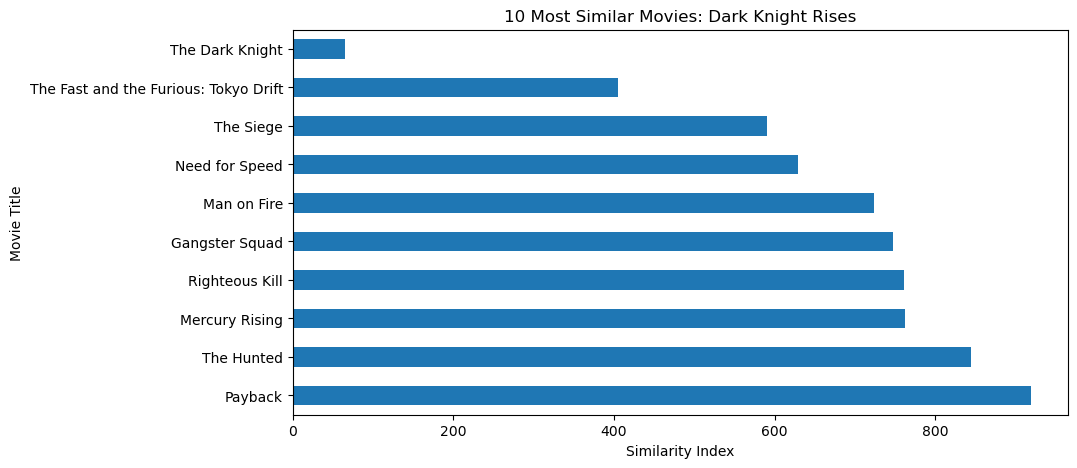

In [111]:
similar_movies.plot.barh(figsize = (10,5))
plt.title('10 Most Similar Movies: Dark Knight Rises')
plt.xlabel('Similarity Index')
plt.ylabel('Movie Title')
plt.show()